In [ ]:
import cv2
import albumentations as A
from matplotlib import pyplot as plt
from google.colab import drive
import os


In [ ]:
#mounting google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path = '/content/drive/My Drive/Proj/1.png'
image = cv2.imread(image_path)

In [ ]:
#define augment...
def HF(Image):
  HF = A.Compose([A.HorizontalFlip(p=1)])
  return HF(image=Image)['image']

def VF(Image):
  VF = A.Compose([A.VerticalFlip(p=1)])
  return VF(image=Image)['image']

def RT(Image):
  RT=A.Rotate(limit=60, p=1)
  return RT(image=Image)['image']

def BL(Image):
  BL=A.Blur(blur_limit=(3, 7), p=1)
  return BL(image=Image)['image']


#making rest of them

def SC(Image):
  #scalingFunc
  width = 30 #pixels
  height = 20 #pixels
  SC = A.Compose(A.Resize(width=width, height=height))
  return SC(image=Image)['image']

def SH(Image):
  #ShearFunc
  x = -40
  y = 40
  SH = A.Compose(A.Affine(shear={'x': x, 'y': y}))
  #shear_limit= 0.3
  return SH(image=Image)['image']

def GN(Image):
  #Gaussian Noise
  var_limit=(10.0,40.0)
  GN = A.Compose(A.GaussNoise(var_limit=var_limit))
  return GN(image=Image)['image']

def BRT(Image):
  #Brightness Adjustment
  brightness_limit=(-0.5, 0.9)
  BRT = A.Compose([A.RandomBrightnessContrast(brightness_limit=brightness_limit, contrast_limit=0, p=1)])
  return BRT(image=Image)['image']

def EL(Image):
  #elastico
  alpha = 100
  sigma = 30
  alpha_affine = 50
  p = 1
  EL = A.ElasticTransform(alpha=alpha, sigma=sigma, alpha_affine=alpha_affine, p=1)
  return EL(image=Image)['image']

def GRID(Image):
  #grid contrast
  num_steps=5
  distort_limit=0.2 #0.6 per cell
  GRID = A.GridDistortion(num_steps=num_steps, distort_limit=distort_limit, p=1)
  return GRID(image=Image)['image']

def RND(Image):
  #random crop
  width = 150 #size of width
  height = 100 #size of height
  RND = A.Compose(A.RandomCrop(height=height, width=width))
  return RND(image=Image)['image']



In [ ]:
# Apply augmentation
HF_Img = HF(image)
VF_Img = VF(image)
RT_Img = RT(image)
BL_Img = BL(image)
SC_Img = SC(image)
SH_Img = SH(image)
GN_Img = GN(image)
BRT_Img = BRT(image)
EL_Img = EL(image)
GRID_Img = GRID(image)
RND_Img = RND(image)

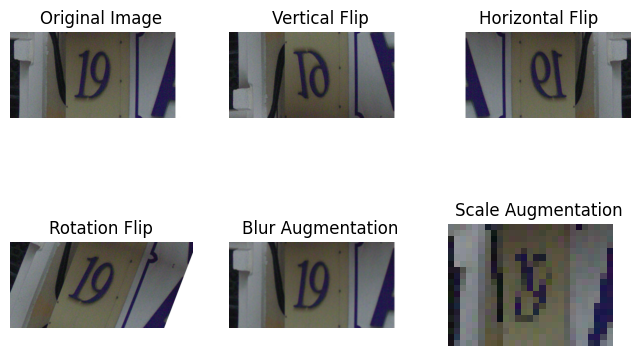

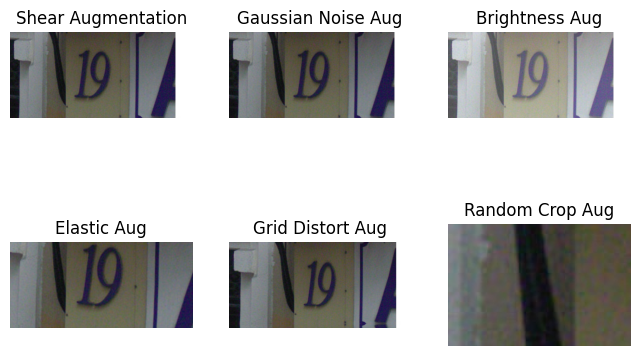

In [ ]:
# Plot original and augmented images
def show_results1(image, VFAug ,HFAug, RTAug, BLAug, SCAug):
  plt.figure(figsize=(8, 5))
  plt.subplot(2, 3, 1)
  plt.title('Original Image')
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(2, 3, 2)
  plt.title('Vertical Flip')
  plt.imshow(cv2.cvtColor(VFAug, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(2, 3, 3)
  plt.title('Horizontal Flip')
  plt.imshow(cv2.cvtColor(HFAug, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(2, 3, 4)
  plt.title('Rotation Flip')
  plt.imshow(cv2.cvtColor(RTAug, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(2, 3, 5)
  plt.title('Blur Augmentation')
  plt.imshow(cv2.cvtColor(BLAug, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  #remaining func

  plt.subplot(2, 3, 6)
  plt.title('Scale Augmentation')
  plt.imshow(cv2.cvtColor(SCAug, cv2.COLOR_BGR2RGB))
  plt.axis('off')


  plt.show()



def show_results2(SHAug, GNAug, BRTAug, ELAug, GRIDAug, RNDAug):
  #remaining func
  plt.figure(figsize=(8, 5))
  plt.subplot(2, 3, 1)
  plt.title('Shear Augmentation')
  plt.imshow(cv2.cvtColor(SHAug, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(2, 3, 2)
  plt.title('Gaussian Noise Aug')
  plt.imshow(cv2.cvtColor(GNAug, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(2, 3, 3)
  plt.title('Brightness Aug')
  plt.imshow(cv2.cvtColor(BRTAug, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(2, 3, 4)
  plt.title('Elastic Aug')
  plt.imshow(cv2.cvtColor(ELAug, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(2, 3, 5)
  plt.title('Grid Distort Aug')
  plt.imshow(cv2.cvtColor(GRIDAug, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(2, 3, 6)
  plt.title('Random Crop Aug')
  plt.imshow(cv2.cvtColor(RNDAug, cv2.COLOR_BGR2RGB))
  plt.axis('off')



show_results1(image,VF_Img, HF_Img, RT_Img, BL_Img, SC_Img)
show_results2(SH_Img, GN_Img, BRT_Img, EL_Img, GRID_Img, RND_Img)